# Two sets of Fluxonium with a tunable Tmon qubits

# Ec is 1.00GHz.
# And LP's are 200nm.

## Design&LOM&GDS

### Preparations

In [1]:
# For convenience, let's begin by enabling
# automatic reloading of modules when they change.
%load_ext autoreload
%autoreload 2

import numpy as np
from collections import OrderedDict

import warnings
warnings.filterwarnings('ignore')

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict
import matplotlib.pyplot as plt

from qiskit_metal.toolbox_metal import math_and_overrides

from qiskit_metal.qlibrary.core import QComponent

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors

from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket
from qiskit_metal.qlibrary.qubits.tmon import Tmon

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond

from qiskit_metal.qlibrary.terminations.open_to_ground_v2 import OpenToGround
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer

from qiskit_metal.analyses.sweep_and_optimize.sweeping import Sweeping


import pyEPR as epr
from qiskit_metal.analyses.quantization import EPRanalysis

In [20]:
# Each time you create a new quantum circuit design,
# you start by instantiating a QDesign class.

# The design class `DesignPlanar` is best for 2D circuit designs.
design = designs.DesignPlanar()
design.chips.main.material = 'silicon'  # our substrate is Silicon
# cpw_width and cpw_gap is defined from the beginnning if you need you can 
# change it later. But with this way one can be sure all the lines are having same width and gap.
design.variables['cpw_width'] = '15 um'  
design.variables['cpw_gap'] = '8.733 um'  
design._chips['main']['size']['size_x'] = '9mm'  # Our device size is 9*9mm
design._chips['main']['size']['size_y'] = '9mm'

# If you disable the next line with "overwrite_enabled", then you will need to
# delete a component [<component>.delete()] before recreating it.
design.overwrite_enabled = True


eig_qres = EPRanalysis(design, "hfss")
hfss = design.renderers.hfss
hfss = eig_qres.sim.renderer
q3d = design.renderers.q3d

# run the GUI 
gui = MetalGUI(design)

In [3]:
from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket
from qiskit_metal.qlibrary.qubits.tmon import Tmon

gds_cell_name_jj = 'junction_0'
gds_cell_name_inductor = 'jj_array0'

# Q1 details
options = dict(chip='main', nanowire = False, 
            orientation =270, pos_x = '-2.2mm', pos_y = '-0.8mm',
            gds_cell_name=gds_cell_name_jj,
            gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='1',
               
    flux_bias_line_options=Dict(make_fbl = False,
            fbl_sep='85um', cpw_width ='10um',
                        cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = +1, make_rol = True, 
              ) )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
             **options))


# Q2 details
options = dict(chip='main', 
            orientation =90, pos_x = '-2.35mm', pos_y = '0.0mm',
               pad_head_width='40um',
        pad_head_length='400um',
        pad_arm_width='80um',
        pad_arm_lenght='1000um',
        palm_radius='80um',
        pad_gap='60um',
              gds_cell_name=gds_cell_name_jj,
                             
    flux_bias_line_options=Dict(make_fbl = True,
            ), 
     )
               
q2 = Tmon(design,'Q2', options = dict(
             **options))

# Q3 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-2.2mm', pos_y = '0.8mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
           fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = True,
              ) )
               
q3 = FluxoniumPocket(design,'Q3', options = dict(
        **options))


gui.rebuild()

In [10]:
from qiskit_metal.qlibrary.qubits.LOMforFX_TR import FluxoniumPocket

In [3]:
from qiskit_metal.qlibrary.qubits.LOMforFX_TR import FluxoniumPocket

# Q1 details
options = dict(chip='main', nanowire = False, 
            orientation =270, pos_x = '-0.2mm', pos_y = '-0.0mm',
           # gds_cell_name=gds_cell_name_jj,
           # gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='1',
               
    flux_bias_line_options=Dict(make_fbl = True,
            fbl_sep='85um', cpw_width ='10um',
                        cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = +1, make_rol = True, 
              ),
    coupler_options=Dict(make_cplr = True,
                       )
              )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
             **options))

gui.rebuild()

In [21]:
from qiskit_metal.qlibrary.terminations.ebeam_marker import Markers

## Markers for ebeam
options = dict(pos_x='4.0mm', pos_y='4.35mm',
                    )
mrk1 = Markers(design, 'marker1', options = options)

options = dict(pos_x='-4.0mm', pos_y='4.35mm',
                    )
mrk2 = Markers(design, 'marker2', options = options)

options = dict(pos_x='-4.0mm', pos_y='-4.35mm',
                    )
mrk3 = Markers(design, 'marker3', options = options)

options = dict(pos_x='4.0mm', pos_y='-4.35mm',
                    )
mrk4 = Markers(design, 'marker4', options = options)


gui.rebuild()

In [22]:
from qiskit_metal.qlibrary.terminations.ebeam_frame import Frame

options = dict(chip='main')
frame = Frame(design, 'frame', options = options)

gui.rebuild()

In [23]:
#Setup the launchpad1 location and orientation

## Read In launch pad
launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='-3.99mm', orientation='0',
        lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPReadIn', options = launch_options)


# Read Out launch pad
launch_options = dict(chip='main', pos_x='4.0mm', pos_y='3.99mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPReadOut', options = launch_options)



Transmission_Line = {'pin_inputs':
           {'start_pin': {'component': 'LPReadIn', 'pin': 'tie'},
             'end_pin': {'component': 'LPReadOut', 'pin': 'tie'}},
            'lead': {'start_straight': '3970um', 'end_straight': '3970um',
                    # 'start_jogged_extension': jogs_in,
                    # 'anchors': anchors1,
                    }, 
                    'total_length': '8mm', 'fillet': "90um"
            }

TransLine = RoutePathfinder(design, 'TL', Transmission_Line)


gui.rebuild()

In [35]:
## Q1 flux-bias and charge line
launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='-2.66mm', orientation='0',
                     lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB1', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='-1.33mm', orientation='0',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPCL1', options = launch_options)


## Q2 flux-bias - Tmon

launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='0.0mm', orientation='0',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB2', options = launch_options)


## Q3 flux-bias and charge line
launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='1.33mm', orientation='0',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPCL3', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='2.66mm', orientation='0',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB3', options = launch_options)


## Q4 flux-bias and charge line
launch_options = dict(chip='main', pos_x='4.0mm', pos_y='2.66mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB4', options = launch_options)

launch_options = dict(chip='main', pos_x='4.0mm', pos_y='1.33mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPCL4', options = launch_options)


## Q5 flux-bias, Tmon
launch_options = dict(chip='main', pos_x='4.0mm', pos_y='0.0mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB5', options = launch_options)


## Q6 flux-bias and charge line
launch_options = dict(chip='main', pos_x='4.0mm', pos_y='-2.66mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPCL6', options = launch_options)

launch_options = dict(chip='main', pos_x='4.0mm', pos_y='-3.99mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB6', options = launch_options)


gui.rebuild()

In [25]:
from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket
from qiskit_metal.qlibrary.qubits.tmon import Tmon

gds_cell_name_jj = 'junction_0'
gds_cell_name_inductor = 'jj_array0'

# Q1 details
options = dict(chip='main', nanowire = False, 
            orientation =270, pos_x = '-2.2mm', pos_y = '-0.8mm',
            gds_cell_name=gds_cell_name_jj,
            gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='1',
               
    flux_bias_line_options=Dict(make_fbl = True,
            fbl_sep='85um', cpw_width ='10um',
                        cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = +1, make_rol = True, 
              ) )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
             **options))


# Q2 details
options = dict(chip='main', 
            orientation =90, pos_x = '-2.35mm', pos_y = '0.0mm',
               pad_head_width='40um',
        pad_head_length='400um',
        pad_arm_width='80um',
        pad_arm_lenght='1000um',
        palm_radius='80um',
        pad_gap='80um',
              gds_cell_name=gds_cell_name_jj,
                             
    flux_bias_line_options=Dict(make_fbl = True,
            ), 
     )
               
q2 = Tmon(design,'Q2', options = dict(
             **options))

# Q3 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-2.2mm', pos_y = '0.8mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
           fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = True,
              ) )
               
q3 = FluxoniumPocket(design,'Q3', options = dict(
        **options))


# Q4 details
options = dict(chip='main', nanowire = False, 
            orientation =90, pos_x = '2.2mm', pos_y = '0.8mm',
            gds_cell_name=gds_cell_name_jj,
            gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
            fbl_sep='85um', cpw_width ='10um',
                        cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = +1, make_rol = True, 
              ) )
               
q4 = FluxoniumPocket(design,'Q4', options = dict(
             **options))


# Q5 details
options = dict(chip='main', 
            orientation =270, pos_x = '2.2mm', pos_y = '0.0mm',
             gds_cell_name=gds_cell_name_jj,
               
    flux_bias_line_options=Dict(make_fbl = True,
            ), 
     )
               
q5 = Tmon(design,'Q5', options = dict(
             **options))

# Q6 details
options = dict(chip='main', nanowire = False,
        orientation =270, pos_x = '2.2mm', pos_y = '-0.8mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='1',
               
    flux_bias_line_options=Dict(make_fbl = True,
           fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = True,
              ) )
               
q6 = FluxoniumPocket(design,'Q6', options = dict(
        **options))

gui.rebuild()

In [26]:
# Lambda/2 resonator for Q1
otg1 = OpenToGround(design, 'otg1s', options=dict(chip='main', 
                 pos_x='-37.733um', pos_y='-1.8mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity1',  Dict(meander=Dict(spacing='200um'),
        total_length='8.4mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg1s', pin='open'),
            end_pin=Dict(component='Q1', pin='readout_line')), ))


gui.rebuild()

In [27]:
# Lambda/2 resonator for Q3
otg3 = OpenToGround(design, 'otg3s', options=dict(chip='main', pos_x='-37.733um',  pos_y='1.6mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity3',  Dict(meander=Dict(spacing='200um'),
        total_length='11.0mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg3s', pin='open'),
            end_pin=Dict(component='Q3', pin='readout_line')), ))


gui.rebuild()

In [28]:
# Lambda/2 resonator for Q4
otg4 = OpenToGround(design, 'otg4s', options=dict(chip='main', pos_x='37.733um',  pos_y='1.6mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity4',  Dict(meander=Dict(spacing='200um'),
        total_length='11.9mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg4s', pin='open'),
            end_pin=Dict(component='Q4', pin='readout_line')), ))


gui.rebuild()
gui.autoscale()

In [29]:
# Lambda/2 resonator for Q6
otg6 = OpenToGround(design, 'otg6s', options=dict(chip='main', pos_x='37.733um',  pos_y='-1.8mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity6',  Dict(meander=Dict(spacing='200um'),
        total_length='9.0mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='50um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg6s', pin='open'),
            end_pin=Dict(component='Q6', pin='readout_line')), ))


gui.rebuild()

In [30]:
# Charge Line and Flux Bias Line for Q1
ZFluxBias_LineQ1 = RoutePathfinder(design, 'Z_Gate1', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='200um', 
        end_straight='400um'),
        pin_inputs=Dict(start_pin=Dict(component='Q1', 
              pin='flux_bias_line'),
          end_pin=Dict(component='LPFB1', pin='tie')
                                   )))

gui.rebuild()

In [31]:
# Charge Line and Flux Bias Line for Q1
XYCharge_LineQ1 = RoutePathfinder(design, 'XY_Gate1', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='150um', end_straight='600um', 
                     ),
            pin_inputs=Dict(start_pin=Dict(component='Q1', pin='charge_line'),
                            end_pin=Dict(component='LPCL1', pin='tie')
                                            )))

gui.rebuild()

In [32]:
# Charge Lıne and Flux Bias Line for Q2
ZFluxBias_LineQ2 = RoutePathfinder(design, 'Z_Gate2', options = dict(chip='main',
             fillet='99um',
          lead=dict(start_straight='250um', end_straight='250um'),
        pin_inputs=Dict(start_pin=Dict(component='Q2', pin='flux_bias_line'),
                            end_pin=Dict(component='LPFB2',pin='tie')
                                            )))

gui.rebuild()

In [33]:
# Charge Lıne and Flux Bias Line for Q3
XYCharge_LineQ3 = RoutePathfinder(design, 'XY_Gate3', options = dict(chip='main',
                         fillet='99um',
       lead=dict(start_straight='250um', end_straight='450um'), 
            pin_inputs=Dict(start_pin=Dict(component='Q3', pin='charge_line'),
                    end_pin=Dict(component='LPCL3', pin='tie')
                                            )))
gui.rebuild()

In [34]:
# Charge Lıne and Flux Bias Line for Q3
ZFluxBias_LineQ3 = RoutePathfinder(design, 'Z_Gate3', options = dict(chip='main',
                fillet='99um',
           lead=dict(start_straight='100um', end_straight='200um'),
            pin_inputs=Dict(start_pin=Dict(component='Q3', pin='flux_bias_line'),
                end_pin=Dict(component='LPFB3', pin='tie')
                                            )))

gui.rebuild()

In [36]:
# Charge Lıne and Flux Bias Line for Q6
ZFluxBias_LineQ6 = RoutePathfinder(design, 'Z_Gate6', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='350um', end_straight='650um'),
        pin_inputs=Dict(start_pin=Dict(component='Q6', 
              pin='flux_bias_line'),
          end_pin=Dict(component='LPFB6', pin='tie')
                                   )))

gui.rebuild()

In [37]:
# Charge Lıne and Flux Bias Line for Q6
XYCharge_LineQ6 = RoutePathfinder(design, 'XY_Gate6', 
        options = dict(chip='main', fillet='99um',
        lead=dict(start_straight='100um', end_straight='650um'),
    pin_inputs=Dict(start_pin=Dict(component='Q6', pin='charge_line'),
    end_pin=Dict(component='LPCL6', pin='tie')
                                            )))

gui.rebuild()

In [39]:
# Charge Line and Flux Bias Line for Q5
ZFluxBias_LineQ5 = RoutePathfinder(design, 'Z_Gate5', options = dict(chip='main',
                        fillet='99um',
            lead=dict(start_straight='200um', end_straight='450um'),
                pin_inputs=Dict(start_pin=Dict(component='Q5', pin='flux_bias_line'),
                            end_pin=Dict(component='LPFB5', pin='tie')
                                            )))
gui.rebuild()

In [40]:
# Charge Line and Flux Bias Line for Q4
XYCharge_LineQ4 = RoutePathfinder(design, 'XY_Gate4', options = dict(chip='main',
                    fillet='99um',
                    lead=dict(start_straight='200um', end_straight='550um'),pin_inputs=Dict(
                        start_pin=Dict(component='Q4', pin='charge_line'),
                            end_pin=Dict(component='LPCL4', pin='tie')
                                            )))
gui.rebuild()

In [41]:
# Charge Lıne and Flux Bias Line for Q4
ZFluxBias_LineQ4 = RoutePathfinder(design, 'Z_Gate4', options = dict(chip='main',
                            fillet='99um',
                    lead=dict(start_straight='150um', end_straight='200um'), pin_inputs=Dict(
                            start_pin=Dict(component='Q4',
                                pin='flux_bias_line'),
                                end_pin=Dict(component='LPFB4',
                                        pin='tie')
                                            )))
gui.rebuild()

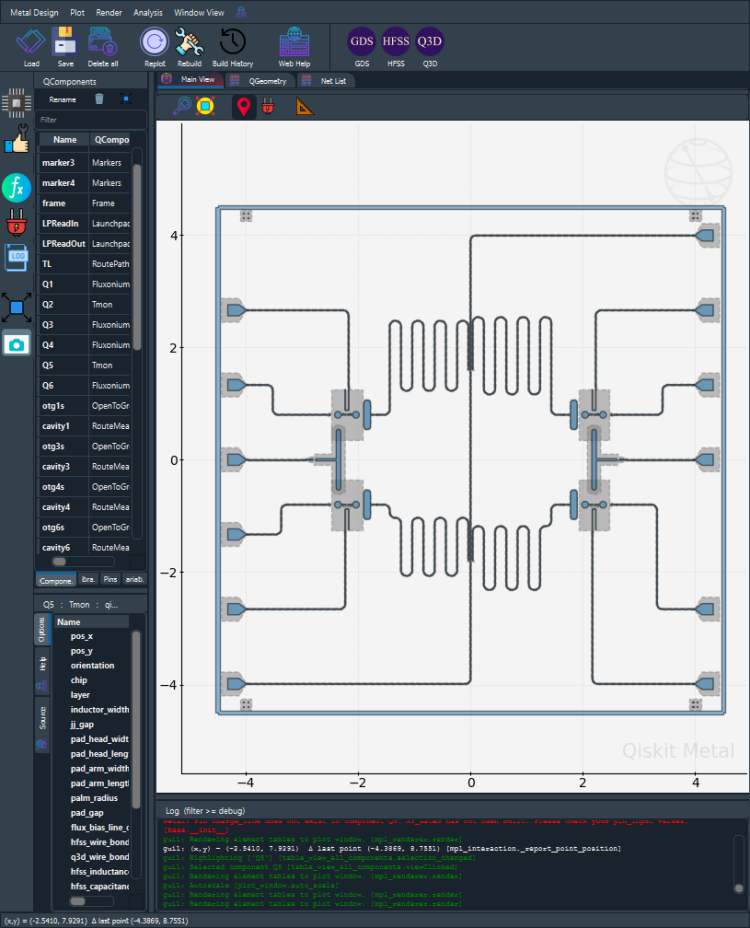

In [42]:
#Save screenshot as a .png formatted file.
gui.screenshot()

In [43]:
q1 #print Q1 information


name:    Q1
class:   FluxoniumPocket       
options: 
  'pos_x'             : '-2.2mm',                     
  'pos_y'             : '-0.8mm',                     
  'orientation'       : 270,                          
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'connection_pads'   : {
                        },
  'pad_gap'           : '30um',                       
  'inductor_width'    : '10um',                       
  'inductor_orientation': '1',                          
  'pad_width'         : '15um',                       
  'pad_height'        : '100um',                      
  'pad_radius'        : '60um',                       
  'l_width'           : '1um',                        
  'array_length'      : '130um',                      
  'l_arm_width'       : '2um',                        
  'l_arm_length'      : '25um',                       
  'l_inductance'      : '200nH',                      
  'l_ind_pe

# LOM Fluxonium Qubits

In [2]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from collections import OrderedDict

import warnings
warnings.filterwarnings('ignore')

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket

from qiskit_metal.toolbox_metal import math_and_overrides

from qiskit_metal.qlibrary.core import QComponent

from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer


In [3]:
# Each time you create a new quantum circuit design,
# you start by instantiating a QDesign class.

# The design class `DesignPlanar` is best for 2D circuit designs.
design = designs.DesignPlanar()
design.chips.main.material = 'silicon'
design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '8.733 um'
design._chips['main']['size']['size_x'] = '9mm'
design._chips['main']['size']['size_y'] = '9mm'

# If you disable the next line with "overwrite_enabled", then you will need to
# delete a component [<component>.delete()] before recreating it.
design.overwrite_enabled = True


eig_qres = EPRanalysis(design, "hfss")
hfss = design.renderers.hfss
hfss = eig_qres.sim.renderer
q3d = design.renderers.q3d

gui = MetalGUI(design)

In [4]:
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket
from qiskit_metal.qlibrary.qubits.tmon import Tmon

gds_cell_name_jj = 'junction_0'
gds_cell_name_inductor = 'jj_array0'

# Q1 details
options = dict(chip='main', nanowire = False, 
            orientation =270, pos_x = '-2.2mm', pos_y = '-0.8mm',
            gds_cell_name=gds_cell_name_jj,
            gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='1',
               
    flux_bias_line_options=Dict(make_fbl = True,
            fbl_sep='85um', cpw_width ='10um',
                        cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = +1, make_rol = True, 
              ) )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
             **options))


# Q2 details
options = dict(chip='main', 
            orientation =90, pos_x = '-2.35mm', pos_y = '0.0mm',
               pad_head_width='40um',
        pad_head_length='400um',
        pad_arm_width='40um',
        pad_arm_lenght='1000um',
        palm_radius='80um',
        pad_gap='100um',
              gds_cell_name=gds_cell_name_jj,
                             
    flux_bias_line_options=Dict(make_fbl = True,
            ), 
     )
               
q2 = Tmon(design,'Q2', options = dict(
             **options))

# Q3 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-2.2mm', pos_y = '0.8mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
           fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = True,
              ) )
               
q3 = FluxoniumPocket(design,'Q3', options = dict(
        **options))


# Q4 details
options = dict(chip='main', nanowire = False, 
            orientation =90, pos_x = '2.2mm', pos_y = '0.8mm',
            gds_cell_name=gds_cell_name_jj,
            gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
            fbl_sep='85um', cpw_width ='10um',
                        cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = +1, make_rol = True, 
              ) )
               
q4 = FluxoniumPocket(design,'Q4', options = dict(
             **options))


# Q5 details
options = dict(chip='main', 
            orientation =270, pos_x = '2.2mm', pos_y = '0.0mm',
             gds_cell_name=gds_cell_name_jj,
               
    flux_bias_line_options=Dict(make_fbl = True,
            ), 
     )
               
q5 = Tmon(design,'Q5', options = dict(
             **options))

# Q6 details
options = dict(chip='main', nanowire = False,
        orientation =270, pos_x = '2.2mm', pos_y = '-0.8mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='1',
               
    flux_bias_line_options=Dict(make_fbl = True,
           fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = True,
              ) )
               
q6 = FluxoniumPocket(design,'Q6', options = dict(
        **options))

gui.rebuild()

## 2. Capacitance Analysis and LOM derivation using the analysis package - most users

In [47]:
#from qiskit_metal.analyses.quantization.lumped_oscillator_model_FX import LOManalysis_FX
from qiskit_metal.analyses.quantization import LOManalysis

c1 = LOManalysis(design, "q3d")

In [48]:
c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 15,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': True,
 'solution_order': 'High',
 'solver_type': 'Iterative'}

In [49]:
# for second method. dont run this
# example: update single setting
c1.sim.setup.max_passes = 15
# example: update multiple settings
c1.sim.setup_update(solution_order = 'Medium', auto_increase_solution_order = 'False')

c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 15,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': 'False',
 'solution_order': 'Medium',
 'solver_type': 'Iterative'}

In [54]:
c1.sim.run(components=['Q2'], open_terminations=[('Q2', 'flux_bias_line')])
c1.sim.capacitance_matrix

INFO 03:30PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 03:30PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 03:30PM [analyze]: Analyzing setup Setup
INFO 03:33PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmp0nwzxhyc.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 03:33PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmpksbp6nrg.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 03:33PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmp_9_70stt.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 03:33PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmpodk1rs18.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSi

,flux_bias_line_Q2,ground_main_plane,tmon_Q2
flux_bias_line_Q2,20.40758,-19.44137,-0.80490
ground_main_plane,-19.44137,255.73930,-162.33495
tmon_Q2,-0.80490,-162.33495,168.19648


In [51]:
# capacitance with pocket-height=650um

Cflux_pad = 19.4858
C_pad = 191.765

C_top = C_pad + Cflux_pad

Csigma = C_top
print('Total Capacitance:', Csigma, 'fF')

Total Capacitance: 211.2508 fF


In [52]:
e = 1.60217663e-19
hbar = 1.05457182e-34

Ec = e**2/(2*Csigma*1e-15)
Charging_energy = 1e-6*Ec/(2*np.pi*hbar)
print('Charging Energy:', Charging_energy, 'MHz')

Charging Energy: 91.69304535038201 MHz


In [20]:
c1.sim.run(components=['Q1'], open_terminations=[('Q1', 'flux_bias_line'), ('Q1', 'fake_flux_bias_line'), ('Q1', 'charge_line'), ('Q1', 'readout_line')])
c1.sim.capacitance_matrix

INFO 05:39PM [connect_project]: Connecting to Ansys Desktop API...
INFO 05:39PM [load_ansys_project]: 	Opened Ansys App
INFO 05:39PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 05:39PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/figenyilmaz/Documents/Ansoft/
	Project:   Project45
INFO 05:39PM [connect_design]: No active design found (or error getting active design).
INFO 05:39PM [connect]: 	 Connected to project "Project45". No design detected
INFO 05:39PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
WARNING 05:39PM [connect_setup]: 	No design setup detected.
WARNING 05:39PM [connect_setup]: 	Creating Q3D default setup.
INFO 05:39PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 05:39PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 05:39PM [analyze]: Analyzing setup Setup
INFO 05:40PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppDat

,charge_line_Q1,flux_bias_line_Q1,ground_main_plane,pad_bot_Q1,pad_top_Q1,readout_padNline_Q1
charge_line_Q1,22.19689,-0.12070,-21.17714,-0.60197,-0.06797,-0.04608
flux_bias_line_Q1,-0.12070,59.10004,-45.19862,-4.81039,-4.77560,-2.19272
ground_main_plane,-21.17714,-45.19862,348.86658,-25.61681,-21.80397,-166.44086
pad_bot_Q1,-0.60197,-4.81039,-25.61681,37.02333,-3.51848,-1.05784
pad_top_Q1,-0.06797,-4.77560,-21.80397,-3.51848,37.05881,-5.45494
readout_padNline_Q1,-0.04608,-2.19272,-166.44086,-1.05784,-5.45494,177.56685


In [10]:
from qiskit_metal.analyses.quantization.lumped_oscillator_model import LOManalysis

In [9]:
#from qiskit_metal.analyses.quantization.lumped_oscillator_model_FX import LOManalysis_FX

In [22]:
c1.setup.junctions = Dict({'Lj': 34.38, 'Cj': 0})
c1.setup.freq_readout = [6.74] ## Cavity1 
c1.setup.freq_bus = [5.0, 0.0]

c1.run_lom()
c1.lumped_oscillator_all

[3, 4] [5 0 1]
Predicted Values

Transmon Properties
f_Q 4.888546 [GHz]
EC 990.001791 [MHz]
EJ 4.752635 [GHz]
alpha -893.421866 [MHz]
dispersion 1120023.342533 [KHz]
Lq 34.366136 [nH]
Cq 19.565852 [fF]
T1 nan [us]

**Coupling Properties**

tCqbus1 -2.197765 [fF]
gbus1_in_MHz -58.506185 [MHz]
χ_bus1 -1.252519 [MHz]
1/T1bus1 475.779754 [Hz]
T1bus1 334.513904 [us]

tCqbus2 0.267081 [fF]
gbus2_in_MHz 5.287627 [MHz]
χ_bus2 -0.446627 [MHz]
1/T1bus2 110.014995 [Hz]
T1bus2 1446.665907 [us]

tCqbus3 0.018550 [fF]
gbus3_in_MHz nan [MHz]
χ_bus3 nan [MHz]
1/T1bus3 nan [Hz]
T1bus3 nan [us]
Bus-Bus Couplings
gbus1_2 0.241850 [MHz]
gbus1_3 0.000000 [MHz]
gbus2_3 0.000000 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,4.990365,1047.212281,4.752635,-838.804257,1274753.079159,"[-60.18671803105255, 4.6825324446413745, nan]","[-1.3894235832789021, -4.500221854535272, nan]",1.389424,60.186718
2,4.999715,1052.552274,4.752635,-833.188557,1289478.638194,"[-53.06707559089968, 5.114668576062659, nan]","[-1.0844627613693318, -183.4710043097485, nan]",1.084463,53.067076
3,4.974607,1038.244029,4.752635,-848.04371,1250127.372495,"[-54.59633153838385, 5.057603512033609, nan]","[-1.1354912462682847, -1.956599352777234, nan]",1.135491,54.596332
4,4.950315,1024.499027,4.752635,-861.727789,1212646.146829,"[-56.275769889634475, 5.088967347174941, nan]","[-1.193358391087824, -0.9861395538782576, nan]",1.193358,56.275770
5,4.93714,1017.085853,4.752635,-868.863281,1192565.010185,"[-56.92662313780362, 5.126046867908635, nan]","[-1.2137387068619272, -0.7801372205784936, nan]",1.213739,56.926623
6,4.926356,1011.03988,4.752635,-874.553208,1176258.176788,"[-57.82165950954699, 5.18288219811063, nan]","[-1.2459041029792426, -0.6733837362881677, nan]",1.245904,57.821660
7,4.914156,1004.224387,4.752635,-880.825671,1157953.17697,"[-58.64265040244056, 5.198904284437528, nan]","[-1.2741333764473273, -0.5743286344184724, nan]",1.274133,58.642650
8,4.903411,998.243145,4.752635,-886.204945,1141957.236099,"[-58.686519410284745, 5.242115638208901, nan]","[-1.2694522298316246, -0.5136301916662678, nan]",1.269452,58.686519
9,4.894474,993.283803,4.752635,-890.575114,1128743.342236,"[-58.70458654704367, 5.257646752064907, nan]","[-1.2647109200890612, -0.4689575861078821, nan]",1.264711,58.704587
10,4.891506,991.639569,4.752635,-892.005827,1124372.291027,"[-58.57948926983643, 5.277231136520876, nan]","[-1.25749200527262, -0.4582624136619191, nan]",1.257492,58.579489


In [1]:
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer
QAnsysRenderer.default_options

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'x_buffer_width_mm': 0.2,
 'y_buffer_width_mm': 0.2,
 'wb_threshold': '400um',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

In [4]:
from qiskit_metal.qlibrary.qubits.tmon import Tmon
gds_cell_name_jj = 'junction_0'

# Q5 details
options = dict(chip='main', 
            orientation =0, pos_x = '0.0mm', pos_y = '0.0mm',
             gds_cell_name=gds_cell_name_jj, jj_gap = '40um', jj_width = '40um',
              pad_gap='100um', 
    flux_bias_line_options=Dict(make_fbl = True,
            ), 
     )
               
q5 = Tmon(design,'Q5', options = dict(
             **options))

gui.rebuild()
#gui.autoscale()

In [7]:
from qiskit_metal.qlibrary.qubits.tmon import Tmon
gds_cell_name_jj = 'junction_0'

# Q2 details
options = dict(chip='main', 
            orientation =0, pos_x = '0.2mm', pos_y = '0.0mm',
             gds_cell_name=gds_cell_name_jj,
              pad_gap='100um', 
    flux_bias_line_options=Dict(make_fbl = True,
            ), 
     )
               
q2 = Tmon(design,'Q2', options = dict(
             **options))

gui.rebuild()
#gui.autoscale()

In [22]:
hfss.open_ansys()

In [23]:
hfss.connect_ansys()

INFO 12:15AM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:15AM [load_ansys_project]: 	Opened Ansys App
INFO 12:15AM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 12:15AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/figenyilmaz/Documents/Ansoft/
	Project:   Project44
INFO 12:15AM [connect_design]: No active design found (or error getting active design).
INFO 12:15AM [connect]: 	 Connected to project "Project44". No design detected


In [24]:
hfss.activate_eigenmode_design("tmonwithFX")

12:15AM 26s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
12:15AM 26s WARNING [activate_ansys_design]: The design_name=tmonwithFX was not in active project.  Designs in active project are: 
[].  A new design will be added to the project.  
INFO 12:15AM [connect_design]: 	Opened active design
	Design:    tmonwithFX [Solution type: Eigenmode]
WARNING 12:15AM [connect_setup]: 	No design setup detected.
WARNING 12:15AM [connect_setup]: 	Creating eigenmode default setup.
INFO 12:15AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [10]:
hfss.render_design(['Q1', 'Q2'])
#hfss.render_design(['Q1', 'cavity1', 'otg1s'],[('cavity1', 'end')])
#hfss.render_design(['Q1', 'XY_Gate1'],[('XY_Gate1', 'start')])

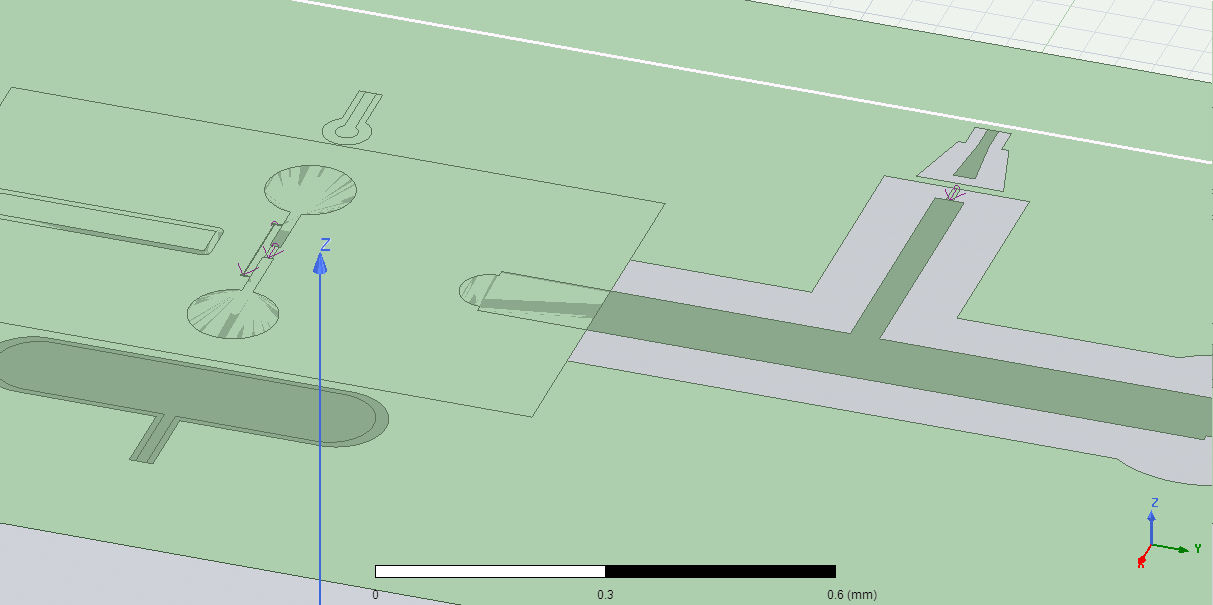

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials_ME/Figen/Fluxonium/GDS-DR/ansys.png')

In [11]:
hfss.save_screenshot()

In [12]:
# Analysis properties
setup = hfss.pinfo.setup
setup.n_modes = 2
setup.passes = 15
#setup.delta_f = 0.05
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
pinfo.design.set_variable('Lj', '34.38 nH')
pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

INFO 10:19PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 2
Number of simulation passes              = 15
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


10:29PM 25s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


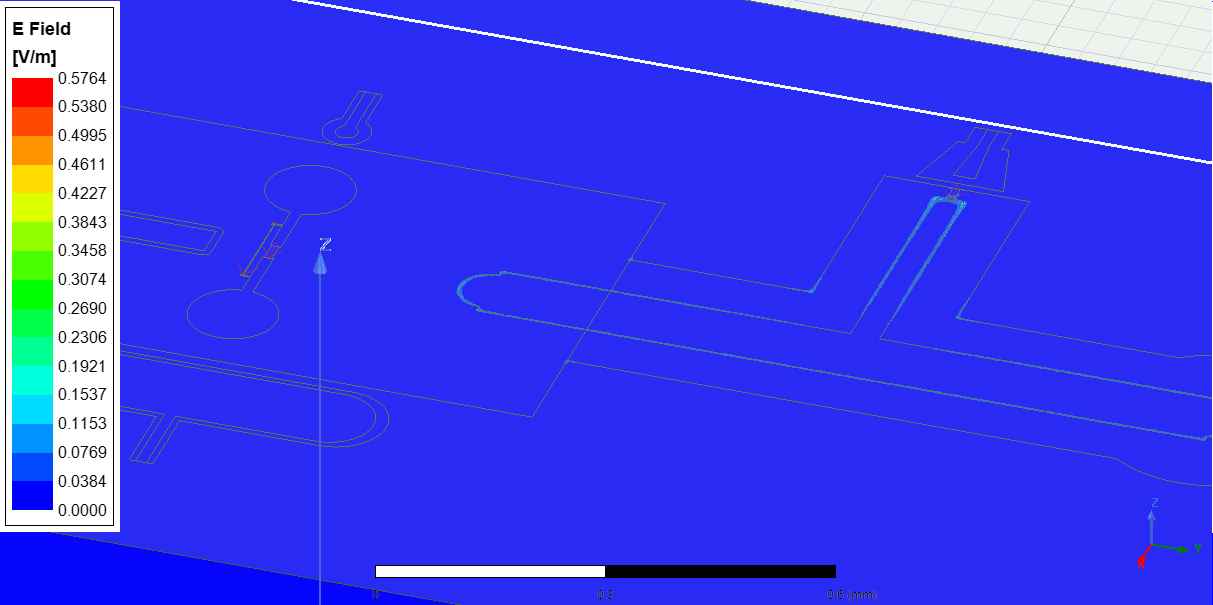

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials_ME/Figen/Fluxonium/GDS-DR/ansys.png')

In [13]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [14]:
hfss.plot_ansys_delete(['Mag_E1'])

10:29PM 55s WARNING [plot_ansys_delete]: This method is deprecated. Change your scripts to use clear_fields()


In [15]:
hfss.set_mode(2, "Setup")

INFO 10:29PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


10:30PM 02s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


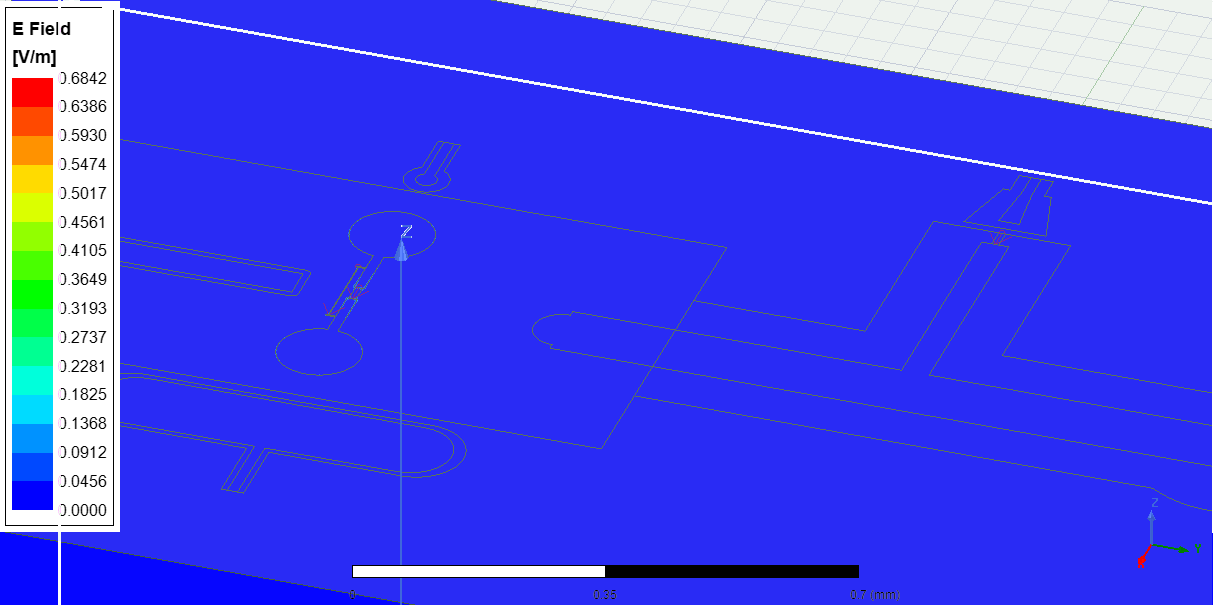

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials_ME/Figen/Fluxonium/GDS-DR/ansys.png')

In [16]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [17]:
hfss.epr_get_frequencies()

Design "tmonwithFX" info:
	# eigenmodes    2
	# variations    1


Freq. (GHz)  Quality Factor
variation mode                             
0         0        3.431040             inf
          1        6.432993             inf

In [25]:
eig_qb = EPRanalysis(design,"hfss")

In [26]:
eig_qb.sim.setup_update(n_modes = 2,
                        max_delta_f = 0.1,
                        min_freq_ghz = 1,
                        max_passes = 12)
eig_qb.sim.setup.vars.Lj = '34.3nH'
eig_qb.sim.setup.vars.Cj = '0.0nH'
eig_qb.sim.setup.vars.Ls = q1.options.l_inductance

eig_qb.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 2,
 'max_delta_f': 0.1,
 'max_passes': 12,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '34.3nH', 'Cj': '0.0nH', 'Ls': '200nH'}}

In [27]:
eig_qb.sim.run(name="FluxoniumEPR", components=['Q1', 'Q2'], open_terminations=[], box_plus_buffer = False)

INFO 12:16AM [connect_design]: 	Opened active design
	Design:    FluxoniumEPR_hfss [Solution type: Eigenmode]
WARNING 12:16AM [connect_setup]: 	No design setup detected.
WARNING 12:16AM [connect_setup]: 	Creating eigenmode default setup.
INFO 12:16AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:16AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:16AM [analyze]: Analyzing setup Setup
12:24AM 33s INFO [get_f_convergence]: Saved convergences to C:\Users\figenyilmaz\Desktop\qiskit-metal\tutorials_ME\Figen\Fluxonium\GDS-DR\hfss_eig_f_convergence.csv


In [28]:
eig_qb.sim.convergence_f

,re(Mode(1)) [g],re(Mode(2)) [g]
Pass [],,
1,6.949160,13.184328
2,1.108060,8.617722
3,1.110691,1.925081
4,2.436525,4.102433
5,3.199351,5.611549
6,3.323289,6.179016
7,3.371436,6.319286
8,3.394636,6.381751
9,3.407454,6.405936


In [29]:
# Add the geometry of the rectangle  and line of the inductor to the list of junctions
eig_qb.setup.junctions.jj.rect = 'JJ_rect_Lj_Q1_rect_jj'
eig_qb.setup.junctions.jj.line = 'JJ_Lj_Q1_rect_jj_'

eig_qb.add_junction(name_junction ='inductor')
eig_qb.setup.junctions.inductor.Lj_variable = 'Ls'
eig_qb.setup.junctions.inductor.rect = 'JJ_rect_Lj_Q1_inductor'
eig_qb.setup.junctions.inductor.line = 'JJ_Lj_Q1_inductor_'
# eig_qb.setup.junctions.inductor.is_junction = False

# Set up th EPR analysis parameters
eig_qb.setup.fock_trunc = 15
eig_qb.setup.cos_trunc = 6
eig_qb.setup.flux = 0.0

eig_qb.setup.basis = 'HO'

# eig_qb.setup.sweep_variable = 'flux'   #--- This would be nice to implement to get a sweep over flux bias 
eig_qb.setup

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_'},
  'inductor': {'Lj_variable': 'Ls',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_inductor',
   'line': 'JJ_Lj_Q1_inductor_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 6,
 'fock_trunc': 15,
 'sweep_variable': 'Lj',
 'flux': 0.0,
 'basis': 'HO'}

In [30]:
# eig_qb.run_epr()
#### equivalent individual calls
s = eig_qb.setup
eig_qb.epr_start()
eig_qb.get_stored_energy()
eig_qb.run_analysis()

Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1
Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1
Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 5.32146447763169e-25
        energy_elec_substrate = 4.89953905229659e-25
        EPR of substrate = 92.1%

        energy_mag    = 1.56184047413758e-26
        energy_mag % of energy_elec_all  = 2.9%
        

Variation 0  [1/1]

  Mode 0 at 3.43 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               97.1%  2.661e-25 7.809e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.92%
	jj              3.22649e-07  (+)        1.0265e-08
		Energy fraction (Lj over Lj&Cj)= 84.35%
	inductor        5.96668e-08  (+)        1.10687e-08
		(U_tot_cap-U_tot_ind)/mea

In [33]:
eig_qb.run_epr()

Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1
Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 3.35714629510862e-26
        energy_elec_substrate = 3.09481242940997e-26
        EPR of substrate = 92.2%

        energy_mag    = 2.00429405090548e-28
        energy_mag % of energy_elec_all  = 0.6%
        

Variation 0  [1/1]

  Mode 0 at 3.43 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               97.1%  2.661e-25 7.809e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.92%
	jj              3.22649e-07  (+)        1.0265e-08
		Energy fraction (Lj over Lj&Cj)= 84.35%
	inductor        5.96668e-08  (+)        1.10687e-08
		(U_tot_cap-U_tot_ind)/mean=94.30%
Calculating Qdielectric_main for mode 0 (0/1)
p_dielectric_mai

WARNING 12:32AM [__init__]: <p>Error: <class 'IndexError'></p>
ERROR 12:32AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 188.6% is > 15%.                     
Is the simulation converged? Proceed with caution



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project44\FluxoniumEPR_hfss\2022-12-25 00-32-20.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization


ERROR 12:32AM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 188.6% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    2.466481e+06
1    1.189562e+00
dtype: float64

Pm_norm idx =
      jj  inductor
0  False     False
1   True     False
*** P (participation matrix, not normlz.)
             jj      inductor
0  3.226487e-07  5.966681e-08
1  7.136023e-01  1.224637e-01

*** S (sign-bit matrix)
   s_jj  s_inductor
0    -1          -1
1    -1          -1
*** P (participation matrix, normalized.)
   3.2e-07    6e-08
      0.85     0.12

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
  3.85e-11 0.000366
  0.000366      877

*** Chi matrix ND (MHz) 
  1.36e-09 -0.00712
  -0.00712     3.32

*** Frequencies O1 PT (MHz)
0    3427.454075
1    5555.716917
dtype: float64

*** Frequencies ND (MHz)
0    3427.453901
1    5337.214031
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj,34.3
0,3427.45
1,5337.21


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0         1
Lj                        
34.3 0  1.36e-09 -7.12e-03
     1 -7.12e-03  3.32e+00

In [32]:
eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc, basis=s.basis, flux=s.flux, junctions=[0])
eig_qb.report_hamiltonian(s.sweep_variable)

TypeError: spectrum_analysis() got an unexpected keyword argument 'basis'

In [18]:
hfss.disconnect_ansys()

In [32]:
gui.main_window.close()

True